# Fundamentals of Computer Vision

This Jupyter Notebook covers **Project 1** of the course and focuses on implementing convolution, linear filtering and template matching to introduce fundamental concepts in image processing. Each section has questions that must be answered in a Document in PDF format.

**Important**

Both the Convolution and Linear Filter tasks (Code + Answers) must be submitted; otherwise, your work will be rejected.


## Grading Breakdown: ##
- Convolution: 40 points (Code: 24 pts, Answers: 16 pts).
- Linear Filtering: 45 points (Code: 27 pts, Answers: 18 pts).
- (OPTIONAL) Matching Template: 15 points (Code: 9 pts, Answers: 6 pts).

To pass Project 1, a minimum of **50 points** is required.

# **Convolution**

In this exercise, you will implement a convolution function that applies a kernel to an input image. Follow these steps to complete the implementation of the `convolution()` function:

1. Flip the kernel.

2. Add padding to the input image (if padding > 0).

3. Initialize an output matrix based on image and kernel dimensions.

4. Perform element-wise multiplication of the flipped kernel and image region for each position, summing the results.

5. Return the output matrix.

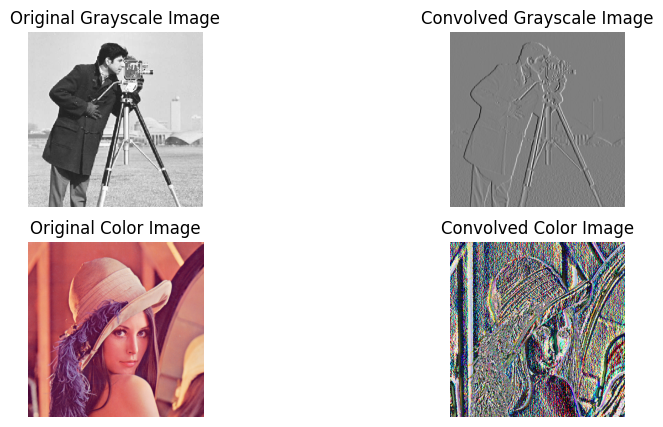

In [91]:
import cv2
from PIL import Image
from skimage import data
import matplotlib.pyplot as plt
import numpy as np

# Load an image (grayscale and color)
image_grayscale = cv2.imread('images/cameraman.png', cv2.IMREAD_GRAYSCALE)
image_color = cv2.imread('images/lenna.png', cv2.IMREAD_COLOR)

# Create a kernel
kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]) 

# Set needed variables
padding = 0
stride = 1

def convolution(image, kernel, padding=0, stride=1):
    """
    Performs a convolution operation on a multi-channel image using a given kernel.

    Parameters:
      image: A 2D or 3D array representing the input image (height, width, channels).
      kernel: A 2D array representing the convolution kernel (height, width).
      padding: An integer representing the amount of padding.
      stride: An integer representing the step size for moving the kernel.

    Returns:
      An array representing the output image after applying the convolution operation.
    """

    # Flip the kernel
    kernel = np.flip(kernel)
    
    # Determine if the image is grayscale or color
    
    if len(image.shape) == 2:  # Grayscale image
        image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
        height_image, width_image = image.shape
        output = np.zeros(((height_image + 2 * padding - kernel.shape[0]) // stride + 1,
                           (width_image + 2 * padding - kernel.shape[1]) // stride + 1))
        for y in range(output.shape[0]):
            for x in range(output.shape[1]):
                region = image_padded[y * stride:y * stride + kernel.shape[0], x * stride:x * stride + kernel.shape[1]]
                output[y, x] = np.sum(region * kernel)
        return output

    else:  # Color image
        channels = []
        for c in range(image.shape[2]):
            image_padded = np.pad(image[:, :, c], ((padding, padding), (padding, padding)), mode='constant')
            height_image, width_image = image[:, :, c].shape
            output = np.zeros(((height_image + 2 * padding - kernel.shape[0]) // stride + 1,
                               (width_image + 2 * padding - kernel.shape[1]) // stride + 1))
            for y in range(output.shape[0]):
                for x in range(output.shape[1]):
                    region = image_padded[y * stride:y * stride + kernel.shape[0], x * stride:x * stride + kernel.shape[1]]
                    output[y, x] = np.sum(region * kernel)
            channels.append(output)
        return np.stack(channels, axis=2)


# Apply the convolution
custom_result_grayscale = convolution(image_grayscale, kernel, padding, stride)
custom_result_color = convolution(image_color, kernel, padding, stride)

# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(image_grayscale, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Convolved Grayscale Image")
plt.imshow(custom_result_grayscale, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Original Color Image")
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Convolved Color Image")
plt.imshow(cv2.cvtColor(custom_result_color.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


In [90]:
#image_grayscale.shape
custom_result_grayscale.shape

(20, 20)

After implementing your convolution function, compare your output with results obtained from OpenCV and SciPy to verify the accuracy of your implementation.

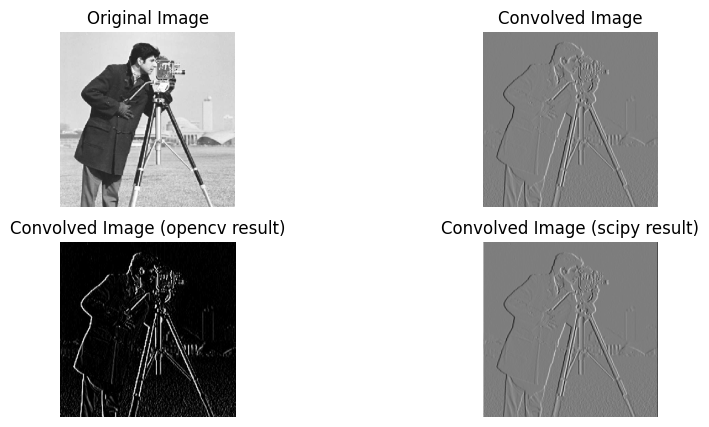

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


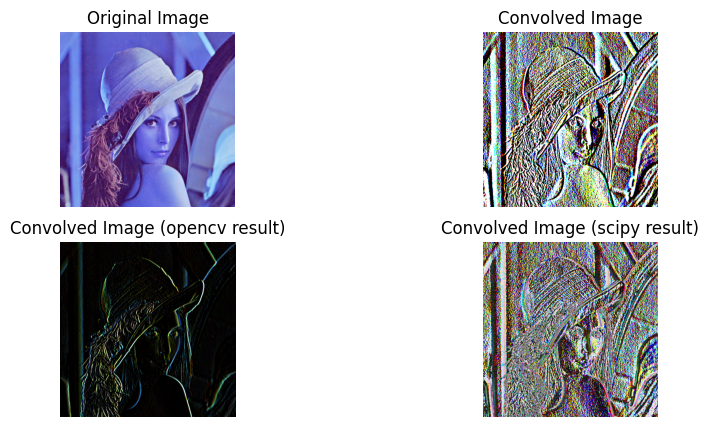

In [74]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Load images
image_grayscale = cv2.imread('images/cameraman.png', cv2.IMREAD_GRAYSCALE)
image_color = cv2.imread('images/lenna.png', cv2.IMREAD_COLOR)

# Create a kernel
kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]) 

# Set needed variables
padding = 0
stride = 1


# my convolution
my_result_grayscale = convolution(image_grayscale, kernel, padding, stride) #grayscale
my_result_color = convolution(image_color, kernel, padding, stride) #color

# OpenCV's convolution
opencv_result_grayscale = cv2.filter2D(image_grayscale, -1, kernel, borderType=cv2.BORDER_REPLICATE)
opencv_result_color = cv2.filter2D(image_color, -1, kernel, borderType=cv2.BORDER_REPLICATE)

# Scipy's convolution
scipy_result_grayscale = convolve2d(image_grayscale, kernel, mode='same')
#scipy_result_color = convolve2d(image_color, kernel, mode='same')
# Scipy's convolution for color images (apply to each channel separately)
scipy_result_color = np.zeros_like(image_color)  # Initializing an empty array 
for i in range(3):  # Loop over each color channel (B, G, R)
    scipy_result_color[:, :, i] = convolve2d(image_color[:, :, i], kernel, mode='same')


# Display of the image and convolved image
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image_grayscale, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Convolved Image")
plt.imshow(my_result_grayscale, cmap='gray')
plt.axis('off')


plt.subplot(2, 2, 3)
plt.title("Convolved Image (opencv result)")
plt.imshow(opencv_result_grayscale, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Convolved Image (scipy result)")
plt.imshow(scipy_result_grayscale, cmap='gray')
plt.axis('off')

plt.show()


plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image_color, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Convolved Image")
plt.imshow(my_result_color, cmap='gray')
plt.axis('off')


plt.subplot(2, 2, 3)
plt.title("Convolved Image (opencv result)")
plt.imshow(opencv_result_color, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Convolved Image (scipy result)")
plt.imshow(scipy_result_color, cmap='gray')
plt.axis('off')

plt.show()



**Questions that must be included in your Report**.

Answer the questions briefly and directly, including the images obtained from the execution of your code to explain your conclusions. Answers must be connected to the executed code.

1. How would you describe the convolution process to another student? Use your own words.

2. What is the role of padding in the convolution operation, and what are the different types of padding?

3. How does the stride parameter influence the convolution operation?

4. How do small kernels (e.g., 3x3) and large kernels (e.g., 5x5 or 7x7) affect the outcome of the convolution operation?

5. Why is OpenCV's convolution result so different from your implementation and SciPy's convolution?

# **Linear Filtering**

In this section, you will implement the following linear filters to process the provided images:

- Edge Detection Filters:
  - (A). Laplacian Filter
  - (B). Sobel Filter

- Blurring Filters:
  - (C). Average Box Filter (also named Mean Filter)
  - (D). Gaussian Filter  

(E). You will also add noise to an image and analyse how it affects the performance of the filters.

By implementing these filters, you will gain insights into their effects on image characteristics, enhancing your understanding of fundamental image processing techniques.

(A). In this exercise, you will implement a **Laplacian Filter** function using your previously implemented convoluton function.

Apply your Laplacian Filter function using the following Laplacian kernel:

\begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0
\end{bmatrix}


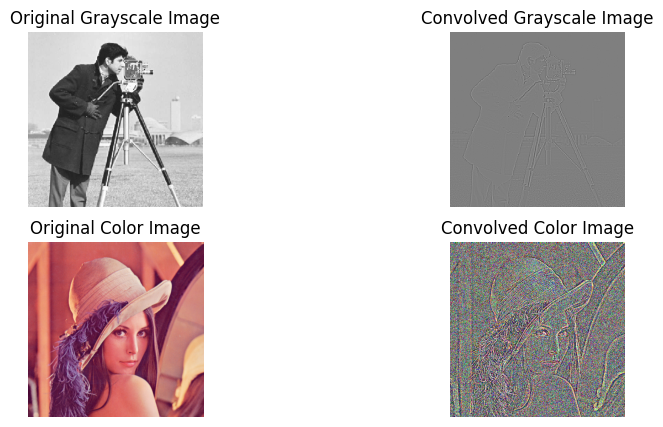

In [80]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image (grayscale and color)
image_grayscale = cv2.imread('images/cameraman.png', cv2.IMREAD_GRAYSCALE)
image_color = cv2.imread('images/lenna.png', cv2.IMREAD_COLOR)

# Create the Laplacian kernel
laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]) 

# Set needed variables
padding = 0
stride = 1

def laplacian_filter(image, kernel, padding, stride):
    # Flip the kernel
    kernel = np.flip(kernel)
   
    # Determine if the image is grayscale or color
    if len(image.shape) == 2:  # Grayscale image
        image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
        height_image, width_image = image.shape
        laplacian_output = np.zeros(((height_image + 2 * padding - kernel.shape[0]) // stride + 1,
                           (width_image + 2 * padding - kernel.shape[1]) // stride + 1))
        for y in range(laplacian_output.shape[0]):
            for x in range(laplacian_output.shape[1]):
                region = image_padded[y * stride:y * stride + kernel.shape[0], x * stride:x * stride + kernel.shape[1]]
                laplacian_output[y, x] = np.sum(region * kernel)
        return laplacian_output

    else:  # Color image
        channels = []
        for c in range(image.shape[2]):
            image_padded = np.pad(image[:, :, c], ((padding, padding), (padding, padding)), mode='constant')
            height_image, width_image = image[:, :, c].shape
            laplacian_output = np.zeros(((height_image + 2 * padding - kernel.shape[0]) // stride + 1,
                               (width_image + 2 * padding - kernel.shape[1]) // stride + 1))
            for y in range(laplacian_output.shape[0]):
                for x in range(laplacian_output.shape[1]):
                    region = image_padded[y * stride:y * stride + kernel.shape[0], x * stride:x * stride + kernel.shape[1]]
                    laplacian_output[y, x] = np.sum(region * kernel)
            channels.append(laplacian_output)
            laplacian_output = np.stack(channels, axis=2)
        return laplacian_output  # Output after applying the Laplacian filter

# Apply the Laplacian filter
laplacian_output_grayscale = laplacian_filter(image_grayscale, laplacian_kernel, padding, stride)
laplacian_output_color = laplacian_filter(image_color, laplacian_kernel, padding, stride)

# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(image_grayscale, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Convolved Grayscale Image")
plt.imshow(laplacian_output_grayscale, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Original Color Image")
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Convolved Color Image")
plt.imshow(cv2.cvtColor(laplacian_output_color.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


(B). Now, implement a **Sobel Filter** function by following these steps:
1. Use your previously implemented convolution function.
2. Calculate the gradient magnitude.
3. Normalize the output to the range [0-255].
4. Optionally, convert the result to uint8.

Apply your Sobel Filter function using the following Sobel kernels:

sobel\_x = 
\begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}

sobel\_y = 
\begin{bmatrix}
1 & 2 & 1 \\
0 & 0 & 0 \\
-1 & -2 & -1
\end{bmatrix}





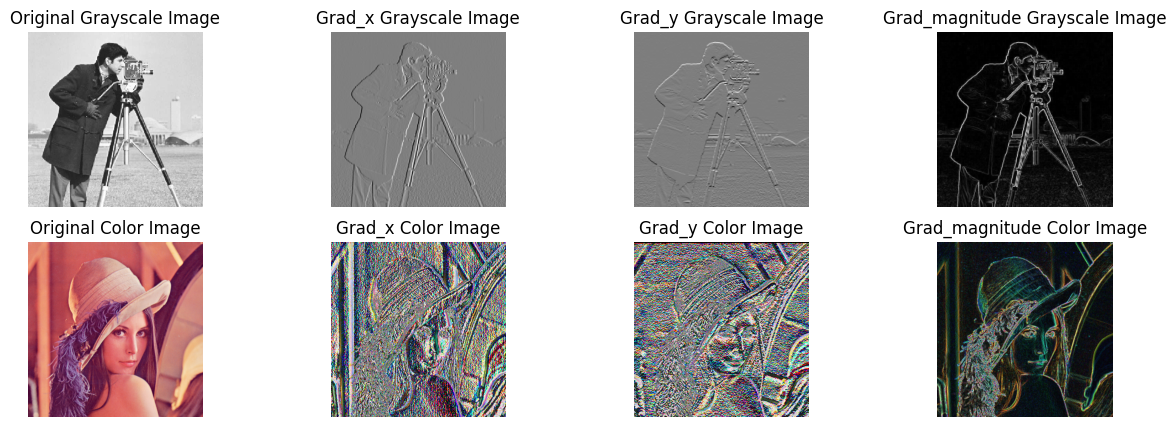

In [81]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images (grayscale and color)
image_grayscale = cv2.imread('images/cameraman.png', cv2.IMREAD_GRAYSCALE)
image_color = cv2.imread('images/lenna.png', cv2.IMREAD_COLOR)

# Create the Sobel kernels
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) 
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]) 

# Sobel filter function
def sobel_filter(image, kernel_x, kernel_y, padding=0, stride=1):
    # Determine if the image is grayscale or color
    if len(image.shape) == 2:  # Grayscale image
        # Apply padding
        image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
        height_image, width_image = image.shape
        
        # Create output matrices for gradients
        gradient_x = np.zeros(((height_image + 2 * padding - kernel_x.shape[0]) // stride + 1, 
                               (width_image + 2 * padding - kernel_x.shape[1]) // stride + 1))
        gradient_y = np.zeros_like(gradient_x)
        
        # Convolve the image with Sobel kernels
        for y in range(gradient_x.shape[0]):
            for x in range(gradient_x.shape[1]):
                region = image_padded[y * stride:y * stride + kernel_x.shape[0], x * stride:x * stride + kernel_x.shape[1]]
                gradient_x[y, x] = np.sum(region * kernel_x)
                gradient_y[y, x] = np.sum(region * kernel_y)
        
        # Compute gradient magnitude
        gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
        
        return gradient_x, gradient_y, gradient_magnitude
    
    else:  # Color image
        channels_x = []
        channels_y = []
        for c in range(image.shape[2]):  # Loop through each channel (R, G, B)
            # Apply padding
            image_padded = np.pad(image[:, :, c], ((padding, padding), (padding, padding)), mode='constant')
            height_image, width_image = image[:, :, c].shape
            
            # Create output matrices for gradients
            gradient_x = np.zeros(((height_image + 2 * padding - kernel_x.shape[0]) // stride + 1, 
                                   (width_image + 2 * padding - kernel_x.shape[1]) // stride + 1))
            gradient_y = np.zeros_like(gradient_x)
            
            # Convolve the image with Sobel kernels for each channel
            for y in range(gradient_x.shape[0]):
                for x in range(gradient_x.shape[1]):
                    region = image_padded[y * stride:y * stride + kernel_x.shape[0], x * stride:x * stride + kernel_x.shape[1]]
                    gradient_x[y, x] = np.sum(region * kernel_x)
                    gradient_y[y, x] = np.sum(region * kernel_y)
            
            # Store gradients for each channel
            channels_x.append(gradient_x)
            channels_y.append(gradient_y)
        
        # Stack the gradients from each channel
        gradient_x = np.stack(channels_x, axis=2)
        gradient_y = np.stack(channels_y, axis=2)
        
        # Compute the gradient magnitude
        gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
        
        return gradient_x, gradient_y, gradient_magnitude

# Apply the Sobel filter to the grayscale image
grad_x_grayscale, grad_y_grayscale, grad_magnitude_grayscale = sobel_filter(image_grayscale, sobel_x, sobel_y)

# Apply the Sobel filter to the color image
grad_x_color, grad_y_color, grad_magnitude_color = sobel_filter(image_color, sobel_x, sobel_y)


# Display the images
plt.figure(figsize=(15, 5))

plt.subplot(2, 4, 1)
plt.title("Original Grayscale Image")
plt.imshow(image_grayscale, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.title("Grad_x Grayscale Image")
plt.imshow(grad_x_grayscale, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.title("Grad_y Grayscale Image")
plt.imshow(grad_y_grayscale, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.title("Grad_magnitude Grayscale Image")
plt.imshow(grad_magnitude_grayscale, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.title("Original Color Image")
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 4, 6)
plt.title("Grad_x Color Image")
plt.imshow(cv2.cvtColor(grad_x_color.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 4, 7)
plt.title("Grad_y Color Image")
plt.imshow(cv2.cvtColor(grad_y_color.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 4, 8)
plt.title("Grad_magnitude Color Image")
plt.imshow(cv2.cvtColor(grad_magnitude_color.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

Implement the **Average Box Filter** (or Mean Filter) by following these steps:
1. Ensure the kernel size is odd.
2. Create the Averaging Kernel: Construct a square kernel of size
$kernel\_size × kernel\_size$ where each element is set to $\frac{1}{kernel\_size²}$. This kernel will be used to compute the average of the neighboring pixels.
3. Apply your previously implemented convolution function.

Apply your Average Box Filter function using a square kernel of $3 \times 3$, which is equivalent to the kernel:

average_kernel =
\begin{bmatrix}
\frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
\frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
\frac{1}{9} & \frac{1}{9} & \frac{1}{9}
\end{bmatrix}

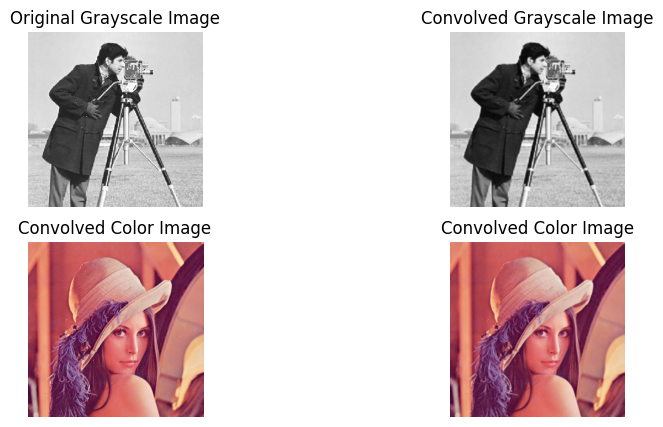

In [ ]:
# Load images (grayscale and color)
image_grayscale = cv2.imread('images/cameraman.png', cv2.IMREAD_GRAYSCALE)
image_color = cv2.imread('images/lenna.png', cv2.IMREAD_COLOR)


# Set kernel size
kernel_size = 3

# Set needed variables
padding = 0
stride = 1

def average_box_filter(image, kernel_size, padding, stride):
    # 1. Ensure the kernel size is odd.
    if kernel_size % 2 == 0:
        kernel_size += 1

    # 2. Create the Averaging Kernel
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size ** 2)
    
    
    
    # 3. Use your convolution function
    if len(image.shape) == 2:  # Grayscale image
         image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
         height_image, width_image = image.shape
         output = np.zeros(((height_image + 2 * padding - kernel.shape[0]) // stride + 1, (width_image + 2 * padding - kernel.shape[1]) // stride + 1))
         for y in range(output.shape[0]):
             for x in range(output.shape[1]):
                 region = image_padded[y * stride:y * stride + kernel.shape[0], x * stride:x * stride + kernel.shape[1]]
                 output[y, x] = np.sum(region * kernel)
         return output
 
    else:  # Color image
         channels = []
         for c in range(image.shape[2]):
             image_padded = np.pad(image[:, :, c], ((padding, padding), (padding, padding)), mode='constant')
             height_image, width_image = image[:, :, c].shape
             output = np.zeros(((height_image + 2 * padding - kernel.shape[0]) // stride + 1,
                                (width_image + 2 * padding - kernel.shape[1]) // stride + 1))
             for y in range(output.shape[0]):
                 for x in range(output.shape[1]):
                     region = image_padded[y * stride:y * stride + kernel.shape[0], x * stride:x * stride + kernel.shape[1]]
                     output[y, x] = np.sum(region * kernel)
             channels.append(output)
         return np.stack(channels, axis=2)

# Apply the Sobel filter
filtered_image_grayscale = average_box_filter(image_grayscale, kernel_size, padding, stride)
filtered_image_color = average_box_filter(image_color, kernel_size, padding, stride)

# Display the original and filtered images
# Your code to display images goes here!

plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(image_grayscale, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Convolved Grayscale Image")
plt.imshow(filtered_image_grayscale, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Convolved Color Image")
plt.imshow(cv2.cvtColor(image_color.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Convolved Color Image")
plt.imshow(cv2.cvtColor(filtered_image_color.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


(C). Implement the **Gaussian Filter** by following these steps:

1. Ensure the Kernel Size is Odd.
2. Create the Gaussian Kernel using the provided **`gaussian_kernel()`** function.

  This function constructs a square kernel of size $kernel\_size \times kernel\_size$ and computes the kernel values using the Gaussian function defined as:
  $kernel(x, y) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}}$.
  
  After computing the kernel values, the function normalizes the kernel to ensure that the sum of all elements equals 1. This normalization process is crucial as it allows the kernel to be used for computing the weighted average of neighboring pixels, effectively giving more importance to pixels closer to the center of the kernel.
    
3. Use your previously implemented convolution function.

In [ ]:
def gaussian_kernel(kernel_size, sigma):
    """
    Creates a Gaussian kernel.

    Parameters:
        kernel_size (int): Size of the kernel (must be odd).
        sigma (float): Standard deviation for the Gaussian distribution.

    Returns:
        np.ndarray: Gaussian kernel.
    """
    if kernel_size % 2 == 0:
        raise ValueError("Kernel size must be an odd number.")

    # Create a grid of (x,y) coordinates
    ax = np.linspace(-(kernel_size // 2), kernel_size // 2, kernel_size)
    xx, yy = np.meshgrid(ax, ax)

    # Calculate the Gaussian function
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))

    # Normalize the kernel
    kernel /= np.sum(kernel)

    return kernel

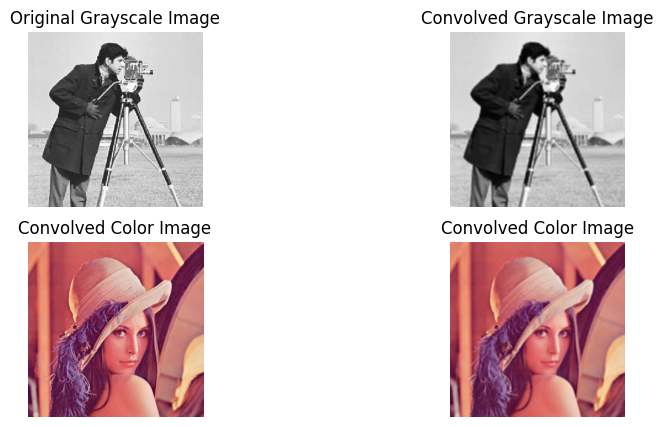

In [ ]:
# Load images
image_grayscale = cv2.imread('images/cameraman.png', cv2.IMREAD_GRAYSCALE)
image_color = cv2.imread('images/lenna.png', cv2.IMREAD_COLOR)


# Set Gaussian kernel size
kernel_size = 5
sigma = 1.0

# Set needed variables
padding = 0
stride = 1

def gaussian_filter(image, kernel_size=5, sigma=1.0):
    """
    Applies a Gaussian Filter to the given image.

    Parameters:
        image (np.ndarray): Input image (2D array for grayscale, 3D for RGB).
        kernel_size (int): Size of the Gaussian kernel (must be odd).
        sigma (float): Standard deviation for the Gaussian distribution.

    Returns:
        np.ndarray: Filtered image.
    """
    # Create the Gaussian kernel
    kernel = gaussian_kernel(kernel_size, sigma)

    # Use your convolution function
    
    # 3. Use your convolution function
    if len(image.shape) == 2:  # Grayscale image
         image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
         height_image, width_image = image.shape
         output = np.zeros(((height_image + 2 * padding - kernel.shape[0]) // stride + 1, (width_image + 2 * padding - kernel.shape[1]) // stride + 1))
         for y in range(output.shape[0]):
             for x in range(output.shape[1]):
                 region = image_padded[y * stride:y * stride + kernel.shape[0], x * stride:x * stride + kernel.shape[1]]
                 output[y, x] = np.sum(region * kernel)
         return output
 
    else:  # Color image
         channels = []
         for c in range(image.shape[2]):
             image_padded = np.pad(image[:, :, c], ((padding, padding), (padding, padding)), mode='constant')
             height_image, width_image = image[:, :, c].shape
             output = np.zeros(((height_image + 2 * padding - kernel.shape[0]) // stride + 1,
                                (width_image + 2 * padding - kernel.shape[1]) // stride + 1))
             for y in range(output.shape[0]):
                 for x in range(output.shape[1]):
                     region = image_padded[y * stride:y * stride + kernel.shape[0], x * stride:x * stride + kernel.shape[1]]
                     output[y, x] = np.sum(region * kernel)
             channels.append(output)
         return np.stack(channels, axis=2)


# Apply the Gaussian filter
filtered_image_grayscale = average_box_filter(image_grayscale, kernel_size, padding, stride)
filtered_image_color = average_box_filter(image_color, kernel_size, padding, stride)

# Display the original and filtered images
# Your code to display images goes here!

plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(image_grayscale, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Convolved Grayscale Image")
plt.imshow(filtered_image_grayscale, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Convolved Color Image")
plt.imshow(cv2.cvtColor(image_color.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Convolved Color Image")
plt.imshow(cv2.cvtColor(filtered_image_color.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

(E). In the previous exercises, you applied linear filters to the original image and observed different filtered outputs. Now, you will modify the original image by adding salt-and-pepper noise. After adding the noise using the `salt_paper()` function, apply the same linear filters to the noisy image. The goal is to compare the filtered outputs of the noisy image with those of the original image to see how the noise impacts the filtering results.


In [ ]:
def salt_pepper(image, salt_prob, pepper_prob):
    """
    Add salt and pepper noise to an image.

    :param image: Input image (NumPy array).
    :param salt_prob: Probability of adding salt noise (white pixels).
    :param pepper_prob: Probability of adding pepper noise (black pixels).
    :return: Noisy image with salt and pepper noise added.
    """
    noisy_image = np.copy(image)

    # Salt noise (white pixels)
    num_salt = np.ceil(salt_prob * image.size).astype(int)
    coords_salt = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_image[tuple(coords_salt)] = 255  # For salt (white)

    # Pepper noise (black pixels)
    num_pepper = np.ceil(pepper_prob * image.size).astype(int)
    coords_pepper = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy_image[tuple(coords_pepper)] = 0  # For pepper (black)

    return noisy_image

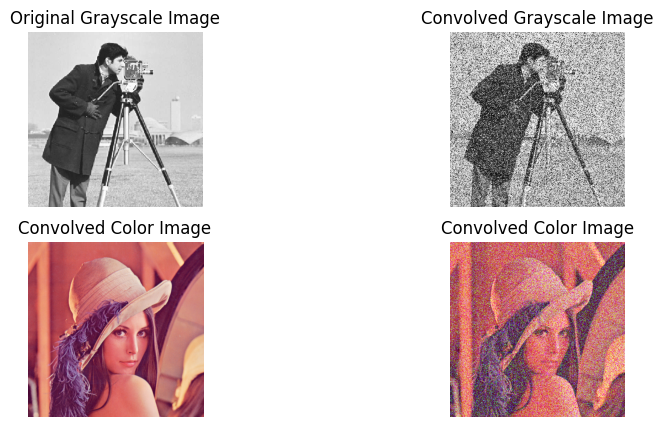

In [ ]:
# Load images
image_grayscale = cv2.imread('images/cameraman.png', cv2.IMREAD_GRAYSCALE)
image_color = cv2.imread('images/lenna.png', cv2.IMREAD_COLOR)

# Add salt-and-pepper noise
salt_prob = 0.2
pepper_prob = 0.2
noisy_image_grayscale = salt_pepper(image_grayscale, salt_prob, pepper_prob)
noisy_image_color = salt_pepper(image_color, salt_prob, pepper_prob)

# Display the original and noisy images
# Your code to display images goes here!

plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(image_grayscale, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Convolved Grayscale Image")
plt.imshow(noisy_image_grayscale, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Convolved Color Image")
plt.imshow(cv2.cvtColor(image_color.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Convolved Color Image")
plt.imshow(cv2.cvtColor(noisy_image_color.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

**Questions that must be included in your Report**.

Answer the questions briefly and directly, including the images obtained from the execution of your code to explain your conclusions. Answers must be connected to the executed code.

6. Briefly describe the goal of each linear filter. Use your own words.

7. The Sobel filter detects edges in specific directions (horizontal or vertical). What are the potential advantages and disadvantages of using a directional filter like Sobel versus a non-directional filter like Laplacian in edge detection tasks?

8. After adding salt-and-pepper noise to the image, which filter (Laplacian, Sobel, Mean or Gaussian) is the most effective at reducing noise? Justify your answer with observations from the filtered outputs.



# **Template Matching** (OPTIONAL)

Template Matching is a computer vision technique for identifying patterns in larger images, commonly used in image recognition and object detection. It compares a small image (template) with regions of a larger image to find similarities.

A key measure of similarity in template matching is the Normalized Cross-Correlation (NCC), which normalizes the cross-correlation between the template and image regions. This normalization enhances robustness against variations in brightness and contrast.

The mathematical expression for NCC between an image region and a template is defined as follows:

**NCC Formula**

Given:

$I$: The image region of size $H \times W$ (height $H$, width $W$)

$T$: The template of size $H \times W$

$\mu_I$: Mean of the image region $I$

$\mu_T$: Mean of the template $T$

$\sigma_I$: Standard deviation of the image region $I$

$\sigma_T$: Standard deviation of the template $T$


The Normalized Cross-Correlation (NCC) is expressed mathematically as:

$NCC(I, T) = \frac{\sum_{x=0}^{W-1} \sum_{y=0}^{H-1} (I(x, y) - \mu_I)(T(x, y) - \mu_T)}{\sigma_I \cdot \sigma_T \cdot H \cdot W}
$


**Breakdown of the Formula**

Numerator:
* $(I(x, y) - \mu_I)$: This term calculates the deviation of each pixel in the image region from the mean of that region.

* $(T(x, y) - \mu_T)$: This term calculates the deviation of each pixel in the template from the mean of the template.

The sum of these products across all pixels in the region gives a measure of how similar the patterns in the image region and template are.

Denominator:

* $\sigma_I$: The standard deviation of the image region, which accounts for the variability of pixel values in that region.
* $\sigma_T$: The standard deviation of the template, which does the same for the template.
* $H \cdot W$: The total number of pixels in the image region (or template), normalizing the result to make it independent of the size of the area being compared.


Result Interpretation

The resulting NCC value will be between $-1$ and $1$:
* $1$: Perfect correlation (the image region matches the template exactly).
* $0$: No correlation.
* $-1$: Perfect negative correlation (the image region is the opposite of the template).


This formula captures both the shape and the intensity distributions of the image region and the template, making it robust against changes in brightness and contrast.

---

The provided code performs template matching using NCC. You will:

1. Implement the NCC computation inside `normalized_cross_correlation()` and return the corresponding output.
2. Filter the resulting NCC values based on a correlation threshold.
3. Draw bounding boxes around the areas in the image where high correlation values are found (matches).


In [22]:
import os
import cv2
import numpy as np

In [71]:
def draw_bounding_boxes(image, matches, template_shape):
    # Copy the image to draw on
    output_image = np.copy(image)
    tmpl_height, tmpl_width = template_shape

    for _, (x, y) in matches:
        # Draw rectangle (bounding box)
        output_image[x:x + tmpl_height, y:y + tmpl_width] = 150 # Change this gray level as needed.

    return output_image

In [72]:
def load_templates(files_path):
  templates = []

  for filename in (files_path):
    template = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    templates.append((template, (template.shape[0], template.shape[1])))

  return templates

In [180]:
def normalized_cross_correlation(image, template):
    # Get dimensions of image and template
    img_height, img_width = image.shape
    tmpl_height, tmpl_width = template.shape

    # Compute mean and standard deviation of the template
    mu_T = template.mean()  # Mean of the template
    sigma_T = template.std()  # Standard deviation of the template

    # Prepare an array to hold NCC results
    ncc_result = []
    
    # Iterate through the image
    for i in range(img_height - tmpl_height + 1):
        for j in range(img_width - tmpl_width + 1):
            # Extract the region of the image that matches the template size
            region = image[i:i + tmpl_height, j :j + tmpl_width]
            # Compute mean and standard deviation of the region
            mu_R = region.mean()  
            sigma_R = region.std()  

            # calculate ncc
            if sigma_T > 0 and sigma_R > 0: # Avoid division by zero
                ncc_value = np.sum((region - mu_R) * (template - mu_T)) / (tmpl_height * tmpl_width * sigma_T * sigma_R)
                ncc_result.append((ncc_value, (i, j)))

    return ncc_result


# """
#   Example of Output: ncc_result
#   Here's an example of what the output might look like:
#   [
#       (0.85, (50, 100)),  # High correlation at (50, 100)
#       (0.92, (150, 200)), # Very high correlation at (150, 200)
#       (0.78, (300, 400)), # Moderate correlation at (300, 400)
#       # Additional matches...
#   ]
#   """


In [181]:
def filter_results(ncc_result, threshold):
  # Filter the results for high correlation values
  high_correlation_results = []
  for value, (x, y) in ncc_result:
    if value > threshold:
      high_correlation_results.append((value, (x, y)))

  return high_correlation_results

In [182]:
image = cv2.imread('images/template/template_example.png', cv2.IMREAD_GRAYSCALE)
img_height, img_width = image.shape
# Load templates
files_path = ["images/template/template_Circle.png",
              "images/template/template_E.png",
              "images/template/template_H.png",
              "images/template/template_L.png",
              "images/template/template_O.png",
              "images/template/template_Square.png",
              "images/template/template_Triangle.png"]

templates = load_templates(files_path)
for template, shape in templates:
    tmpl_height, tmpl_width = template.shape

print(tmpl_height / 4)

12.5


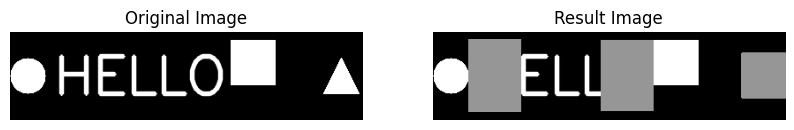

In [275]:
# Load image
image = cv2.imread('images/template/template_example.png', cv2.IMREAD_GRAYSCALE)

# Load templates
files_path = ["images/template/template_Circle.png",
              "images/template/template_E.png",
              "images/template/template_H.png",
              "images/template/template_L.png",
              "images/template/template_O.png",
              "images/template/template_Square.png",
              "images/template/template_Triangle.png"]

templates = load_templates(files_path)

# Store matches
#all_matches = []

# Set matching threshold
threshold = 0.9



# Perform template matching for each template
result_image = np.copy(image)
for template, shape in templates:
  matches = normalized_cross_correlation(result_image, template)
  matches = filter_results(matches, threshold)
  #all_matches.extend(matches)
  result_image = draw_bounding_boxes(result_image, matches, shape)

# # Draw bounding boxes around matches
# I have put this in the for loop so that the shape of the introduced rectancle of function draw_bounding_boxes() matches the template shape
#result_image = draw_bounding_boxes(image, all_matches, shape) 

# Display result image
# Your code goes here!
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Result Image")
plt.imshow(result_image, cmap='gray')
plt.axis('off')

plt.show()

In [235]:
def filter_results_high_cor(ncc_result, threshold, threshold2):
      # Filter the results for high correlation values
  high_correlation_results = []
  for value, (x, y) in ncc_result:
    if threshold2 < value < threshold:
      high_correlation_results.append((value, (x, y)))

  return high_correlation_results

In [271]:
threshold = -0.46
threshold2 = -0.5
matches = normalized_cross_correlation(image, template)
#matches = filter_results(matches, threshold)
matches = filter_results_high_cor(matches, threshold, threshold2)
#matches = np.min(matches)
print(matches)

#max(item[0] for item in matches)


[(-0.4647023381979111, (41, 19)), (-0.46616989613058685, (42, 19)), (-0.46464512446794465, (43, 19))]


**Questions that must be included in your Report**.

Answer the questions briefly and directly, including the images obtained from the execution of your code to explain your conclusions. Answers must be connected to the executed code.

9. What is the goal of template matching in computer vision?
Briefly describe the purpose and typical applications of template matching.

10. Explain the role of Normalized Cross-Correlation (NCC) in template matching. Why is normalization important in comparing image regions and templates?

11. In your own words, explain the meaning of an NCC value of 1, 0, and -1.
What does each of these values indicate about the similarity between the image region and the template? Relate your answers to your output results.